In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from skimage.filters import gabor
from skimage.feature import hog
from sklearn.decomposition import PCA
from skimage import io

import cv2 as cv
import os
import matplotlib.pyplot as plt
print('hello')

import pickle
from IPython.display import FileLink


hello


In [2]:
cv2_base_dir = os.path.dirname(os.path.abspath(cv.__file__))
haar_model = os.path.join(cv2_base_dir, 'data/haarcascade_frontalface_default.xml')
haar_data = cv.CascadeClassifier(haar_model)


In [3]:
def gabor_filter(img):
    return gabor(img, frequency=0.8)[0]

In [4]:
def kmeans(img):
    Z = img.reshape(-1)
    Z = np.float32(Z)
    criteria = (cv.TERM_CRITERIA_EPS +
                cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    K = 8
    ret, label, center = cv.kmeans(
        Z, K, None, criteria, 10, cv.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))
    return res2


In [106]:

nomask_data = []
for dirname, _, filenames in os.walk('H:\Programming\PCD_maskdetection\dataset\without_mask'):
    for filename in filenames:
        img = cv.imread(os.path.join(dirname, filename))
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        # faces = haar_data.detectMultiScale(img, minNeighbors = 5, minSize = (100,100))
        # for x, y, w, h in faces:
        #         face = img[y:y+h, x:x+w]
        #         face = gabor_filter(face)
        #         face = kmeans(face)
        #         face = cv.resize(face, (50, 50))
        face = cv.resize(img, (50, 50))
        face = gabor_filter(face)
        face = kmeans(face)

        nomask_data.append(face)


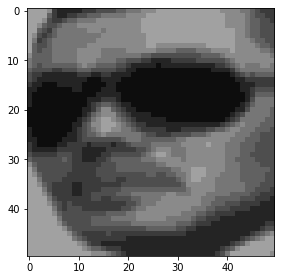

In [110]:


io.imshow((nomask_data[22]))


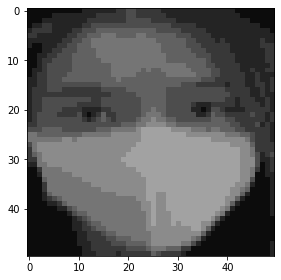

In [109]:
io.imshow((mask_data[70]))


In [105]:
mask_data = []
for dirname, _, filenames in os.walk('H:\Programming\PCD_maskdetection\dataset\with_mask'):
    for filename in filenames:
        if(len(mask_data) < 1500):
            img = cv.imread(os.path.join(dirname, filename))
            img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            #faces = haar_data.detectMultiScale(img, minNeighbors = 5, minSize = (120,120))
            # for x, y, w, h in faces:
            #         face = img[y:y+h, x:x+w]
            #         face = gabor_filter(face)
            #         face = kmeans(face)
            #         face = cv.resize(face, (50, 50))
            face = cv.resize(img, (50, 50))
            face = gabor_filter(face)
            face = kmeans(face)

            mask_data.append(face)


In [111]:
np_nomask = np.array(nomask_data)
print(np_nomask.shape)

(1930, 50, 50)


In [112]:
np_mask = np.array(mask_data)


print(np_mask.shape)

(1500, 50, 50)


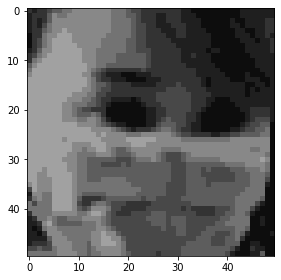

In [113]:
io.imshow(mask_data[55])

In [133]:
np_nomask = np.array(nomask_data)
np_mask = np.array(mask_data)
np_mask = np_mask.reshape(np_mask.shape[0], 50 * 50)
np_nomask = np_nomask.reshape(np_nomask.shape[0], 50 * 50)

X = np.r_[np_mask, np_nomask]
labels = np.zeros(X.shape[0])

labels[np_mask.shape[0]:] = 1.0
print(labels[44])


names = {0: 'Mask', 1: 'Without Mask'}
print(X)



0.0
[[137 137 137 ...  94  94  94]
 [ 13  13  13 ...  50  50  50]
 [158 158 158 ...  79  79  97]
 ...
 [  6   6   6 ...   6   6   6]
 [ 91  91 125 ...  16  31  91]
 [116 129 102 ...  34  34  77]]


In [131]:
x_train, x_test, y_train, y_test = train_test_split(X,labels,test_size = 0.25)
print(x_train)


[[[157 136 136 ... 136 136 136]
  [136  74  74 ...  51  74  74]
  [119  51  51 ...  51  30  30]
  ...
  [ 99  99  99 ...  74  74  74]
  [119 119 119 ...  99  99  99]
  [157 157 157 ... 136 136 136]]

 [[ 39  13  13 ...  39  39  39]
  [ 13  13  13 ...  39  39  39]
  [ 13  13  13 ...  39  39  39]
  ...
  [ 13  13  13 ...  13  13  13]
  [ 13  13  13 ...  13  13  13]
  [ 13  13  13 ...  13  13  13]]

 [[147 147 147 ... 147 167 167]
  [ 96 167 167 ... 167 167 167]
  [ 33 147 167 ... 167 167 167]
  ...
  [ 75  54  96 ... 119 147 167]
  [119 119 119 ... 119 147 167]
  [119 119  75 ...  75 147 147]]

 ...

 [[ 92  71  71 ...  31  31  51]
  [ 71  51  51 ...  31  51  92]
  [ 71  51  31 ...  31  71  92]
  ...
  [ 10  10  10 ...  10  10  10]
  [ 10  10  10 ...  10  10  10]
  [ 10  10  10 ...  10  10  10]]

 [[162 162 162 ... 122 122 122]
  [162 162 162 ... 122 122 104]
  [162 162 162 ... 104 104 104]
  ...
  [ 42  18  42 ...  83 122 143]
  [ 42  42  83 ...  83  83 122]
  [ 42  42 122 ...  64  64  

In [132]:
svm = SVC(C = 2, break_ties = False, cache_size = 200, class_weight = 'balanced', 
          coef0 = 0.0, decision_function_shape = 'ovr', degree = 3, gamma = 'scale',
         kernel = 'rbf', max_iter = -1, probability = False, random_state = None, 
          shrinking = True, tol = 0.001, verbose =False )

svm.fit(x_train, y_train)


ValueError: Found array with dim 3. SVC expected <= 2.

In [44]:
nn = MLPClassifier()

nn.fit(x_train, y_train)

MLPClassifier()

In [128]:

y_pred = svm.predict(x_test)
print('svm', accuracy_score(y_test, y_pred))





svm 0.9055944055944056


In [118]:
print(y_pred)

[0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 1.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0.
 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1.

In [129]:
filename = 'model9.sav'
os.chdir('H:\Programming\PCD_maskdetection')

pickle.dump(svm, open(filename, 'wb'))



(1, 2500)
Mask


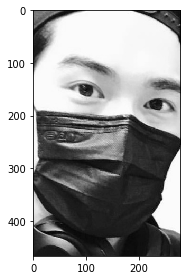

In [123]:
filename = 'dataset/with_mask/0_0_0 copy 38.jpg'
img = cv.imread(filename)
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
io.imshow(img)
img = cv.equalizeHist(img)
img = cv.resize(img, (50, 50))
img = img.reshape(1, -1)
print(img.shape)
print(names[int(svm.predict(img))])
